# Springboard Data Science Career Track Unit 4 Challenge - Tier 3

***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***
***

### 1. Sourcing and Loading
***

#### 1.1. Importing Libraries

In [1]:
from textwrap import fill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### 1.2.  Loading the data
Data comes from the [London Datastore](https://data.london.gov.uk/)

In [2]:
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls" 
properties = pd.read_excel(
    url_LondonHousePrices, sheet_name='Average price', index_col= None
)


### 2. Cleaning, transforming, and visualizing
***

**2.1. Exploring your data** 

In [3]:
for _ in [
        f'shape:\n {properties.shape}', f'first three:\n {properties.head(3)}',
        f'columns:\n{properties.columns}', f'index:\n{properties.index}']:
    print(f'{_}\n{79 * "_"}\n\n')
    

shape:
 (327, 49)
_______________________________________________________________________________


first three:
   Unnamed: 0 City of London Barking & Dagenham       Barnet       Bexley  \
0        NaT      E09000001          E09000002    E09000003    E09000004   
1 1995-01-01    91448.98487         50460.2266  93284.51832  64958.09036   
2 1995-02-01    82202.77314        51085.77983  93190.16963  64787.92069   

         Brent      Bromley       Camden      Croydon       Ealing  ...  \
0    E09000005    E09000006    E09000007    E09000008    E09000009  ...   
1  71306.56698  81671.47692  120932.8881  69158.16225  79885.89069  ...   
2  72022.26197  81657.55944  119508.8622  68951.09542  80897.06551  ...   

    NORTH WEST YORKS & THE HUMBER EAST MIDLANDS WEST MIDLANDS EAST OF ENGLAND  \
0    E12000002          E12000003     E12000004     E12000005       E12000006   
1  43958.48001        44803.42878   45544.52227   48527.52339      56701.5961   
2  43925.42289        44528.80721   4

**2.2. Cleaning the data**

Transposing, renaming columns, and resetting index

In [4]:
ldn_df = properties.transpose()
ldn_df = ldn_df[1:].rename(
    columns = dict(
        list(zip(range(1, len(ldn_df.columns)), ldn_df.iloc[0, 1:]))
        + [(0, 'postcode')]
    )
)
ldn_df.reset_index(inplace = True)

**2.3. Cleaning the data (part 2)**

In [5]:
ldn_df.rename(columns = {'index': 'borough'}, inplace = True)
ldn_df.set_index(['borough', 'postcode'], inplace = True)

**2.4.Transforming the data**

Melting

In [6]:
ldn_df = ldn_df.melt(
    var_name = 'yyyy_mm', value_name = 'average_price', 
    ignore_index = False
)
print(ldn_df.head())

                                yyyy_mm average_price
borough            postcode                          
City of London     E09000001 1995-01-01   91448.98487
Barking & Dagenham E09000002 1995-01-01    50460.2266
Barnet             E09000003 1995-01-01   93284.51832
Bexley             E09000004 1995-01-01   64958.09036
Brent              E09000005 1995-01-01   71306.56698


Enforcing data types on each column

In [7]:
ldn_df = ldn_df.astype(
    {'yyyy_mm': 'datetime64', 'average_price': 'float'}
)
print('Column'.ljust(20) + f'Type\n{79*"_"}')
for col in ldn_df.columns:
    print(f'{(col + ":").ljust(20)}{ldn_df[col].dtypes}')

Column              Type
_______________________________________________________________________________
yyyy_mm:            datetime64[ns]
average_price:      float64


Adding a year and month column from existing date information

In [8]:
ldn_df['month'] = ldn_df.yyyy_mm.dt.month
ldn_df['year'] = ldn_df.yyyy_mm.dt.year

**2.5. Cleaning the data (part 3)**

Removing nulls, sorting by index, and checking the list of boroughs

In [9]:
ldn_df.dropna(inplace = True)
ldn_df.sort_index(inplace = True)
print(f'Boroughs in ldn_df.index\n{79*"_"}')
print(fill(', '.join([_[0] for _ in pd.unique(ldn_df.index)])))

Boroughs in ldn_df.index
_______________________________________________________________________________
Barking & Dagenham, Barnet, Bexley, Brent, Bromley, Camden, City of
London, Croydon, EAST MIDLANDS, EAST OF ENGLAND, Ealing, Enfield,
England, Greenwich, Hackney, Hammersmith & Fulham, Haringey, Harrow,
Havering, Hillingdon, Hounslow, Inner London, Islington, Kensington &
Chelsea, Kingston upon Thames, LONDON, Lambeth, Lewisham, Merton,
NORTH EAST, NORTH WEST, Newham, Outer London, Redbridge, Richmond upon
Thames, SOUTH EAST, SOUTH WEST, Southwark, Sutton, Tower Hamlets, WEST
MIDLANDS, Waltham Forest, Wandsworth, Westminster, YORKS & THE HUMBER


**2.5**

Confining the dataset to rows with a borough matching the list of boroughs available on Wikipedia https://en.wikipedia.org/wiki/London_boroughs#List

In [10]:
london_boroughs = [
    'Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 
    'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 
    'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 
    'Hounslow', 'Islington', 'Kensington & Chelsea', 'Kingston upon Thames', 
    'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 
    'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 
    'Waltham Forest', 'Wandsworth', 'Westminster'
] # list from wikipedia
ldn_df = ldn_df[ldn_df.index.isin(london_boroughs, level = 'borough')]

**2.6. Visualizing the data**

Plotting a borough's average housing price over time

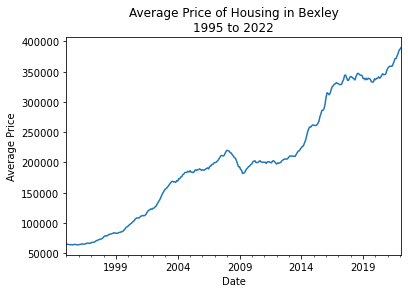

In [11]:
ldn_df.loc[('Bexley', 'E09000004')].plot(
    x = 'yyyy_mm', y = 'average_price', legend = None
)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title(
    f'Average Price of Housing in Bexley\n'
    + f'{min(ldn_df.year)} to {max(ldn_df.year)}'
)
plt.show();

Grouping by borough and year to calculate annual average prices

In [12]:
avg_annual_price_by_borough = (
    ldn_df.groupby(by = ['borough', 'year']).agg({'average_price': np.mean})
) # average of monthly average prices for each year for each borough
avg_annual_price_by_borough.reset_index(inplace = True)
avg_annual_price_by_borough.set_index('borough', inplace = True)
print(avg_annual_price_by_borough.head())

                    year  average_price
borough                                
Barking & Dagenham  1995   51817.969390
Barking & Dagenham  1996   51718.192690
Barking & Dagenham  1997   55974.262309
Barking & Dagenham  1998   60285.821083
Barking & Dagenham  1999   65320.934441


### 3. Modeling
***

In [13]:
def price_ratio(
        borough: str, df: pd.DataFrame = avg_annual_price_by_borough,
        year_col: str = 'year', price_col: str = 'average_price',
        year_1: int = 1998, year_2: int = 2018) -> float:
    '''For a given London borough, return annual average housing cost
    for year_2 divided by that of year_1'''
    subset = df.loc[borough]
    avg_annual = lambda y: (
        float(subset[subset[year_col] == y][price_col])
    )
    return avg_annual(year_2) / avg_annual(year_1)

In [47]:
price_ratios = [(bor, price_ratio(bor)) for bor in london_boroughs]
price_ratios.sort(key = lambda _: _[1], reverse = True)
price_ratios = dict(price_ratios)
text_l = lambda t: str(t).ljust(len(max(london_boroughs, key = len)) + 4)
print(f'{text_l("Borough")}| Ratio (2018 average / 1998 average)')
print(79*'_')
for borough, ratio in price_ratios.items():
    print(f'{text_l(borough)}| {round(ratio, 2)}')

Borough                 | Ratio (2018 average / 1998 average)
_______________________________________________________________________________
Hackney                 6.2
Waltham Forest          5.83
Southwark               5.52
Lewisham                5.45
Westminster             5.35
Newham                  5.31
City of London          5.3
Haringey                5.13
Kensington & Chelsea    5.08
Lambeth                 4.96
Camden                  4.94
Barking & Dagenham      4.9
Brent                   4.89
Islington               4.84
Greenwich               4.76
Wandsworth              4.76
Merton                  4.74
Tower Hamlets           4.63
Redbridge               4.47
Barnet                  4.36
Havering                4.33
Ealing                  4.31
Kingston upon Thames    4.27
Enfield                 4.26
Bexley                  4.25
Croydon                 4.2
Hillingdon              4.2
Hammersmith & Fulham    4.14
Sutton                  4.12
Bromley               

In [15]:
borough_w_highest = max(price_ratios, key = price_ratios.get)
highest_ratio = price_ratios[borough_w_highest]
summary_text = ' '.join([
    f'The borough with the highest increase in annual average housing',
    f'cost from 1998 to 2018 is {borough_w_highest}.\n',
    f'For this borough, the average cost of housing in 2018 was',
    f'{round(highest_ratio * 100, 2)}% of that in 1998.'])
print(fill(summary_text))

The borough with the highest increase in annual average housing cost
from 1998 to 2018 is Hackney.  For this borough, the average cost of
housing in 2018 was 619.83% of that in 1998.


### 4. Conclusion
***
Absent other metrics, few conclusions can be drawn from this analysis. Correlating this information with other datasets over the relevant time period might yield more useful insights, but such efforts likely exceed the intended scope of this project. My domain knowledge is insufficient to infer anything beyond what is already displayed above.

Comparing changes in average housing prices to changes in UK consumer price index. Values are listed relative to 2010 (the consumer price index of 2010 is 100).

Conusmer Price Index values sourced from 
https://data.worldbank.org/indicator/FP.CPI.TOTL?end=2018&locations=GB&start=1998


In [16]:
uk_cpi_1998 = 79.1289069724
uk_cpi_2018 = 117.5790641761

cpi_ratio = uk_cpi_2018/uk_cpi_1998
cpi_adjusted_ratios = {bor: ratio - cpi_ratio for bor, ratio in price_ratios.items()}

print(f'{text_l("Borough")}| CPI-adjusted Ratio')
print(f'{text_l("")}| (2018 average / 1998 averagee - 2018 CPI / 1998 CPI)')
print(79*'_')
for borough, ratio in cpi_adjusted_ratios.items():
    print(f'{text_l(borough)}| {round(ratio, 2)}')


Borough                 | CPI-adjusted Ratio
                        | (2018 average / 1998 averagee - 2018 CPI / 1998 CPI)
_______________________________________________________________________________
Hackney                 | 4.71
Waltham Forest          | 4.35
Southwark               | 4.03
Lewisham                | 3.96
Westminster             | 3.87
Newham                  | 3.82
City of London          | 3.82
Haringey                | 3.65
Kensington & Chelsea    | 3.6
Lambeth                 | 3.47
Camden                  | 3.45
Barking & Dagenham      | 3.41
Brent                   | 3.41
Islington               | 3.36
Greenwich               | 3.28
Wandsworth              | 3.27
Merton                  | 3.26
Tower Hamlets           | 3.14
Redbridge               | 2.99
Barnet                  | 2.87
Havering                | 2.84
Ealing                  | 2.83
Kingston upon Thames    | 2.78
Enfield                 | 2.78
Bexley                  | 2.76
Croydon               

The average prices for housing in all London boroughs increased much more than the UK consumer price index over the period of interest. This suggests an overall decline in housing affordability for the city. The consumer price index ratio is subtracted from the average housing price ratios calculated earlier in the table above. Below, a bar plot depicts the 10 highest (unadjusted) price ratios for London boroughs.

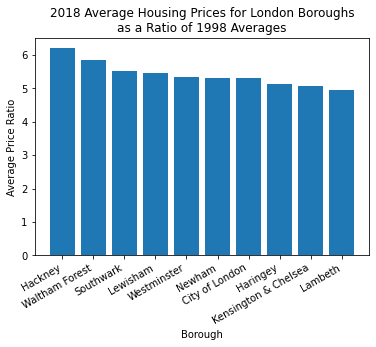

In [17]:
top_10 = dict((list(price_ratios.items())[:10]))
plt.bar(range(10), height = top_10.values(), tick_label = list(top_10.keys()))
plt.xticks(rotation = 30, ha = 'right')
plt.xlabel('Borough')
plt.ylabel('Average Price Ratio')
plt.title(
    '2018 Average Housing Prices for London Boroughs'
    +'\nas a Ratio of 1998 Averages')
plt.show();

['Kensington & Chelsea', 'Westminster', 'City of London', 'Hackney', 'Haringey', 'Lambeth', 'Southwark', 'Waltham Forest', 'Lewisham', 'Newham']


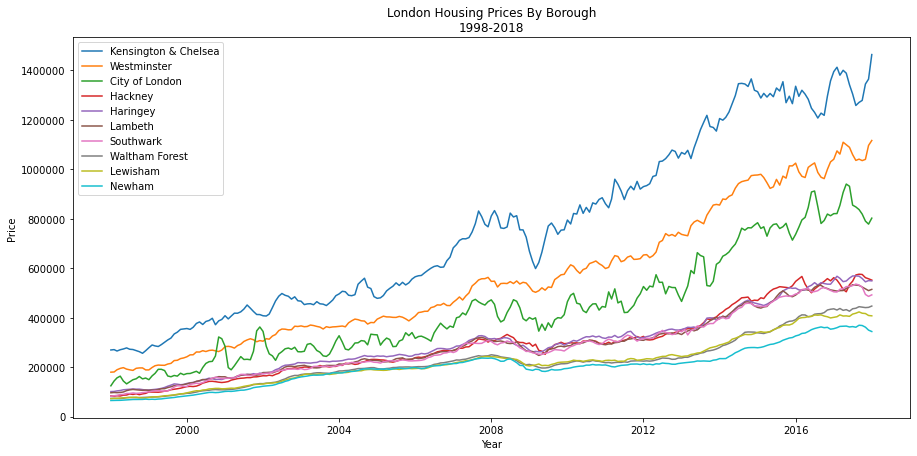

In [41]:
fig, ax = plt.subplots(figsize = (15, 7))
yr = lambda y: pd.to_datetime(y, format='%Y')
top_10_df = ldn_df.loc[[bor for bor in top_10.keys()]]
top_10_df = top_10_df[top_10_df.yyyy_mm.between(yr(1998), yr(2018))]
legend_order = {}
for bor in top_10.keys():
    legend_order[bor] = float(top_10_df[top_10_df.year == 2018].loc[bor].average_price)
legend_order = sorted(legend_order.keys(), key = legend_order.get, reverse = True)
print(legend_order)
for bor in legend_order:
    ax.plot(
        top_10_df.loc[bor].yyyy_mm,
        top_10_df.loc[bor].average_price,
        label = f'{bor}'
    )
plt.ylabel('Price')
plt.xlabel('Year')
ax.ticklabel_format(axis = 'y', useOffset=False, style='plain')
plt.title('London Housing Prices By Borough\n1998-2018')
ax.legend(loc = 'best')
plt.show()

In [19]:
ldn_deltas = pd.DataFrame(avg_annual_price_by_borough)
ldn_deltas = ldn_deltas[ldn_deltas.year.between(1998, 2018)]
ldn_deltas.reset_index(inplace = True)
ldn_1998_avg = ldn_deltas[ldn_deltas.year == 1998]
ldn_1998_avg.head()

,borough,year,average_price
0,Barking & Dagenham,1998,60285.821083
21,Barnet,1998,122359.468033
42,Bexley,1998,80632.020822
63,Brent,1998,100692.590417
84,Bromley,1998,108286.520467


In [20]:
ratio_to_98 = ldn_deltas.merge(
    ldn_1998_avg, how = 'left', on = 'borough', 
    suffixes = ('', '_98')
)

In [21]:
ratio_to_98['ratio'] = ratio_to_98.average_price / ratio_to_98.average_price_98
ratio_to_98.set_index('borough', inplace = True)

In [22]:
ratio_to_98.drop(columns = ['year_98', 'average_price_98', 'average_price'])

,year,ratio
borough,,
Barking & Dagenham,1998,1.000000
Barking & Dagenham,1999,1.083521
Barking & Dagenham,2000,1.286364
Barking & Dagenham,2001,1.470728
Barking & Dagenham,2002,1.861498
...,...,...
Westminster,2014,4.842769
Westminster,2015,5.062894
Westminster,2016,5.225073


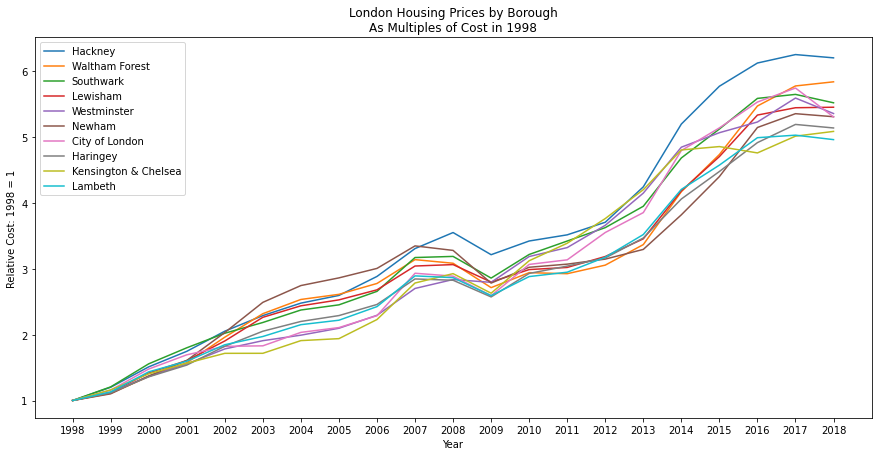

In [23]:
fig, ax = plt.subplots(figsize = (15, 7))
for bor in top_10.keys():
    ax.plot(
        ratio_to_98.loc[bor].year, 
        ratio_to_98.loc[bor].ratio, 
        label = f'{bor}'
    )
    plt.legend()
plt.xticks(range(1998, 2019))
plt.xlabel('Year')
plt.ylabel('Relative Cost: 1998 = 1')
plt.title('London Housing Prices by Borough\nAs Multiples of Cost in 1998')
plt.show()

    

In [24]:
print(ldn_df[ldn_df.average_price == max(ldn_df.average_price)])

                                  yyyy_mm  average_price  month  year
borough              postcode                                        
Kensington & Chelsea E09000020 2018-01-01    1463377.921      1  2018
